In [46]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import os
import seaborn as sns
import tensorflow as tf
from keras import layers

In [11]:
def audio_pipeline(audio):


  features = []

  # Calcul du ZCR

  zcr = librosa.zero_crossings(audio)
  features.append(sum(zcr))

  # Calcul de la moyenne du Spectral centroid

  spectral_centroids = librosa.feature.spectral_centroid(y=audio)[0]
  features.append(np.mean(spectral_centroids))
  
  # Calcul du spectral rolloff point

  rolloff = librosa.feature.spectral_rolloff(y=audio)
  features.append(np.mean(rolloff))

  # Calcul des moyennes des MFCC

  mfcc = librosa.feature.mfcc(y=audio)

  for x in mfcc:
    features.append(np.mean(x))


  return features

In [24]:

audio_files = []


DF=pd.read_csv('dataset_train.csv')


for path in DF['path']:
  audio_files.append(librosa.load(path)[0])

In [25]:
# Définissons les noms des colonnes

column_names = ['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
                'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
                'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

# Création d'un dataframe vide

df = pd.DataFrame(columns = column_names)

# On itère sur les audios pour remplir le dataframe

i = 0

for music in audio_files:
    df.loc[i] = audio_pipeline(music)
    i+=1



In [27]:
df.head()

,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,4181.0,1745.201227,3845.995718,-110.663834,125.155769,10.521477,22.261658,4.729836,5.644761,-5.637497,...,-14.407739,-4.932197,-12.600057,-3.078446,-16.477514,-6.161431,-0.346733,-2.985935,10.189672,0.600276
1,3837.0,1060.166798,2016.501653,-210.534103,181.224792,-26.755941,36.241768,-3.693487,-1.212353,-7.283923,...,-12.862754,1.427936,-1.658757,3.113551,2.133360,9.157292,4.263685,-0.267390,-2.120848,-5.718860
2,4757.0,1882.031019,4316.247746,-29.166685,110.099899,8.671352,33.117798,1.415533,11.807404,-0.118719,...,-7.009494,4.470412,-3.003022,-0.243851,-10.421765,-2.970519,-5.433944,0.165628,-3.116360,5.732065
3,19587.0,3755.141952,7646.357610,-46.430420,47.924728,12.094445,15.203204,-3.226084,13.563443,-2.165857,...,-11.920474,0.052893,-10.597864,6.146528,-7.448946,-2.600280,-5.092677,3.165119,-12.180676,-2.299207
4,5442.0,1299.505195,2317.883676,-374.639679,160.717758,-37.945885,26.474899,-4.476437,3.673451,-14.128020,...,-9.499707,-2.749542,-8.618606,-2.441375,-5.903777,1.244963,-3.145774,-0.455946,-3.933623,-2.582375


In [26]:
df.to_csv('music.csv', index = False)

In [36]:
x_train= pd.read_csv('music.csv').values
y_train=DF.drop(['name','path'],axis=1).values




<AxesSubplot:>

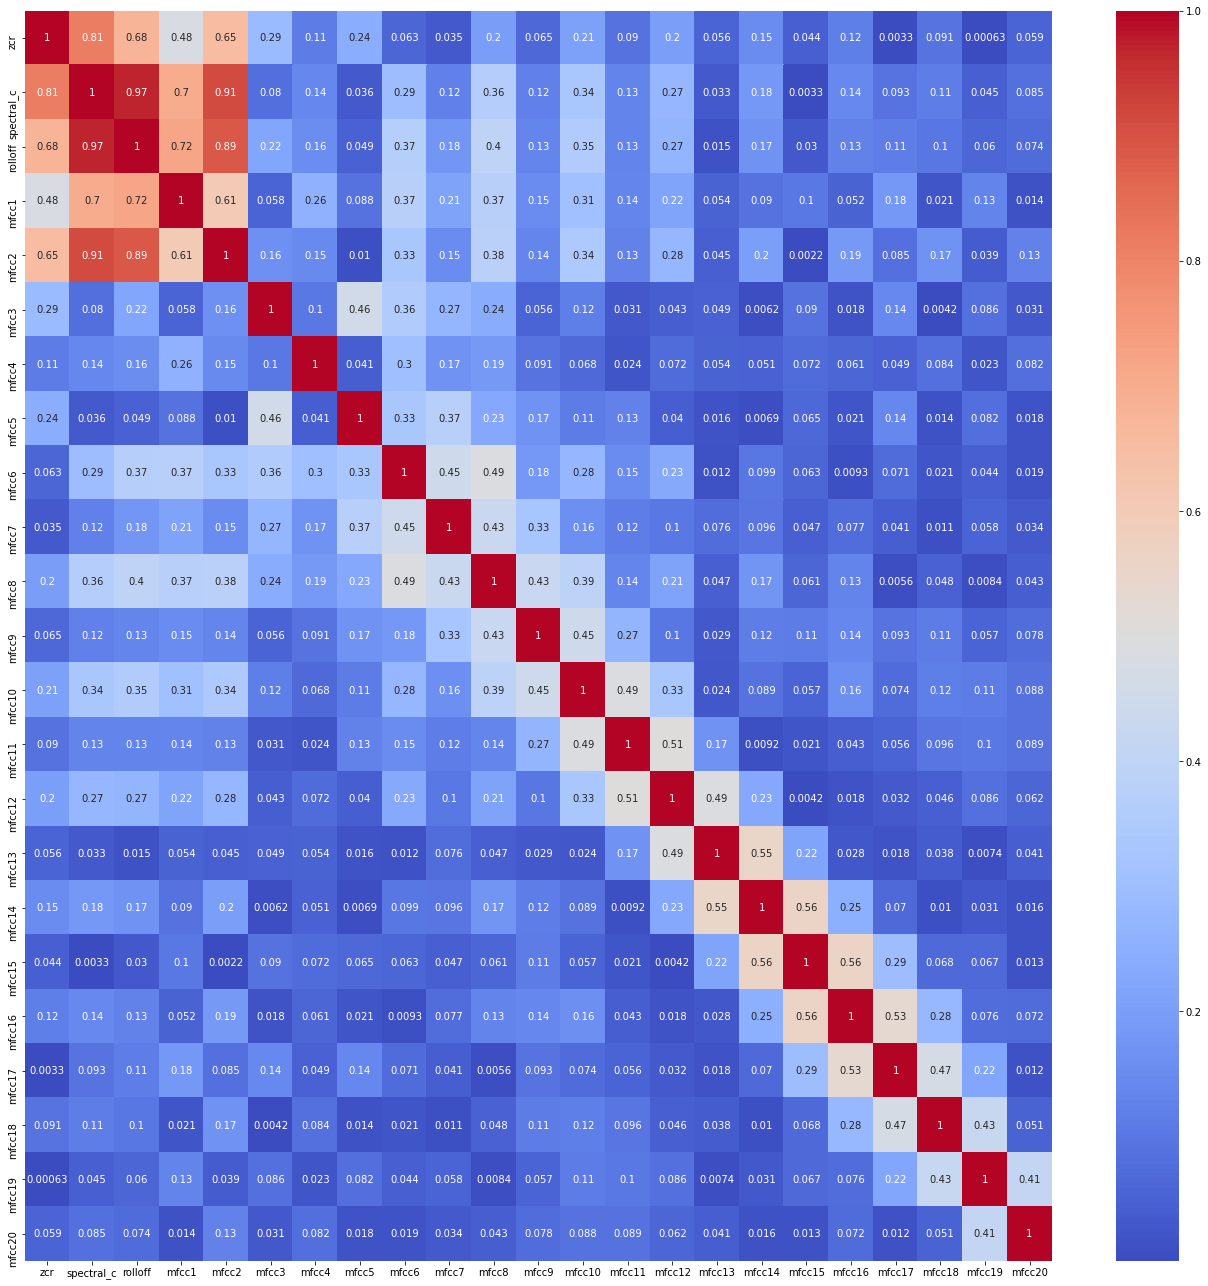

In [61]:
music = pd.read_csv('music.csv')
plt.figure(figsize=(23,23))
sns.heatmap(abs(music.corr()), annot=True,cmap='coolwarm')

In [62]:
model = tf.keras.Sequential([
    layers.Input(23),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(256,activation='sigmoid'),
    layers.Dense(12,activation ='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=5)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               6144      
                                                                 
 dense_44 (Dense)            (None, 256)               65792     
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dense_47 (Dense)            (None, 256)               65792     
                                                                 
 dense_48 (Dense)            (None, 256)               65792     
                                                                 
 dense_49 (Dense)            (None, 12)               

In [59]:
# Assuming you have already trained and compiled your model

# Get a specific row from your dataset

a = np.random.randint(0, 1341)

input_row = x_train[0]  # Replace with your desired row
output_row = y_train[0]  # Replace with your desired row

# Reshape the input row if needed
input_row = input_row.reshape(23, 1)  # Reshape for a single sample

# Perform the prediction
predictions = model.predict(input_row)

# Get the predicted class probabilities
class_probabilities = predictions[0]

# Get the predicted class index
predicted_class_index = tf.argmax(class_probabilities).numpy()

# Get the predicted class label
class_labels = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio", "voi", "drum"]
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label and probabilities
print(output_row)
print("Predicted Class:", predicted_class_label)
print("Class Probabilities:", class_probabilities)


ValueError: in user code:

    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Quentin Fouco\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 23, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None
